<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 31/03/2022
- Convocatoria 2 - 07/04/2022

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que subir el notebook al repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

#### Instalar paquete de API de Kaggle

In [3]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: kaggle in c:\users\n29\appdata\local\programs\python\python311\lib\site-packages (1.5.13)




[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
#Importar paquetes para usar en la actividad
import numpy as np
import pandas as pd
import zipfile as zp
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Autenticacion con Kaggle API
os.environ['KAGGLE_USERNAME'] = "jmejiasb"
os.environ['KAGGLE_KEY'] = "782634d4517fd0263297f09bf847ecad"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [6]:
#Descargar zip de archivos con API de Kaggle
#Para descargar usando el Kaggle API se debe usar el link del dataset (la url de kaggle despues de "www.kaggle.com/") y la ruta donde guardar el archivo zip
route = os.path.join("res")
api.dataset_download_files("heesoo37/120-years-of-olympic-history-athletes-and-results", path = route)
api.dataset_download_files("jayrav13/olympic-track-field-results", path = route)

In [7]:
#Extraer archivos zip de los dataset en su respectiva carpeta

#120 years of olympic history: athletes and results
with zp.ZipFile("res/120-years-of-olympic-history-athletes-and-results.zip") as zipp:
    print('Extracting all files...') 
    zipp.extractall(os.path.join("res","120_years_olympic_history")) 
    print('Done!')
    
#Olympic track field results
with zp.ZipFile("res/olympic-track-field-results.zip") as zipp:
    print('Extracting all files...') 
    zipp.extractall(os.path.join("res","olympic-track-field-results")) 
    print('Done!')

Extracting all files...
Done!
Extracting all files...
Done!


In [8]:
#Guardar csv en su respectivo DataFrame

#120 years of olympic history: athletes and result
olympic_history_route = os.path.join("res","120_years_olympic_history","athlete_events.csv")


olympic_history = pd.read_csv(olympic_history_route, engine="python", header=0)

olympic_history.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
212474,106683,Robert Scheidt,M,31.0,188.0,76.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Sailing,Sailing Mixed One Person Dinghy,Gold
21523,11360,Cludio Biekarck,M,29.0,187.0,84.0,Brazil,BRA,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed One Person Dinghy,NaN
74922,38022,Miha Gale,M,21.0,174.0,79.0,Slovenia,SLO,1998 Winter,1998,Winter,Nagano,Freestyle Skiing,Freestyle Skiing Men's Aerials,NaN
42162,21747,"Edward ""Ed"" Clancy",M,31.0,185.0,79.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Gold
48143,24819,Mustafa Dastanl,M,25.0,168.0,62.0,Turkey,TUR,1956 Summer,1956,Summer,Melbourne,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Gold


In [11]:
#Track field results
olympic_track_field_route = os.path.join("res","olympic-track-field-results","results.csv")

#Al intentar leer el csv lanza error ya que algunos valores de la columna "Results" tienen una coma de mas (ie. ",+0.1") y lo toma como una nueva columna

#olympic_track_field = pd.read_csv(olympic_track_field_route, engine="python", header=0) #ParserError

In [12]:
#Para resolver este error se usa el parametro "usecols" para que solo tome en cuenta las primeras 8 columnas.
olympic_track_field = pd.read_csv(olympic_track_field_route, engine="python", header=0, usecols=range(8))

olympic_track_field.sample(5)

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
1156,M,Hammer Throw Men,Barcelona,1992,S,Igor ASTAPKOVICH,EUN,81.96
1082,M,Decathlon Men,Stockholm,1912,G,Hugo WIESLANDER,SWE,7724.495 P.
1071,M,Decathlon Men,Melbourne / Stockholm,1956,S,Rafer JOHNSON,USA,7587.0
1956,W,4X100M Relay Women,Atlanta,1996,S,NaN,BAH,42.14
1367,M,Long Jump Men,Stockholm,1912,S,Calvin BRICKER,CAN,7.21


### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

In [13]:
#A partir de 1992 los juegos olimpicos de invierno se hacen con dos años de diferencia. 
#Para que todo el grafico quede en intervalos de 4 años, se hace una list comprehension para cambiar estos años de juegos de invierno a los años de los juegos de verano
olympic_history["Year"] = [x+2 if x % 4 != 0 else x for x in olympic_history["Year"]]

olympic_history.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
22225,11704,Jorge Ral Birkner Cogan,M,23.0,179.0,73.0,Argentina,ARG,1988 Winter,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
65778,33663,"Francisco ""Kiko"" Fbregas Monegal",M,30.0,182.0,78.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,Silver
68061,34767,Rui Fernandes,M,25.0,183.0,75.0,Portugal,POR,1996 Summer,1996,Summer,Atlanta,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN
9657,5293,Marco Antonio Arriagada Quinchel,M,20.0,167.0,58.0,Chile,CHI,1996 Summer,1996,Summer,Atlanta,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN
206324,103562,Arthur Rushen,M,NaN,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",NaN


#### - Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes

In [14]:
#Filtrar el numero de deportes y el año en que se hizo, debido a que cada deporte tiene varios eventos se eliminan los duplicados
sports_per_year = olympic_history[["Year","Sport"]].drop_duplicates()

sports_per_year.head(5)

,Year,Sport
0,1992,Basketball
1,2012,Judo
2,1920,Football
3,1900,Tug-Of-War
4,1988,Speed Skating


In [15]:
#Se agrupa por año y se usa el metodo count() para saber el numero de deportes por año
sports_per_year = sports_per_year.groupby("Year", as_index=False).count()

sports_per_year.head(5)

,Year,Sport
0,1896,9
1,1900,20
2,1904,18
3,1908,25
4,1912,17


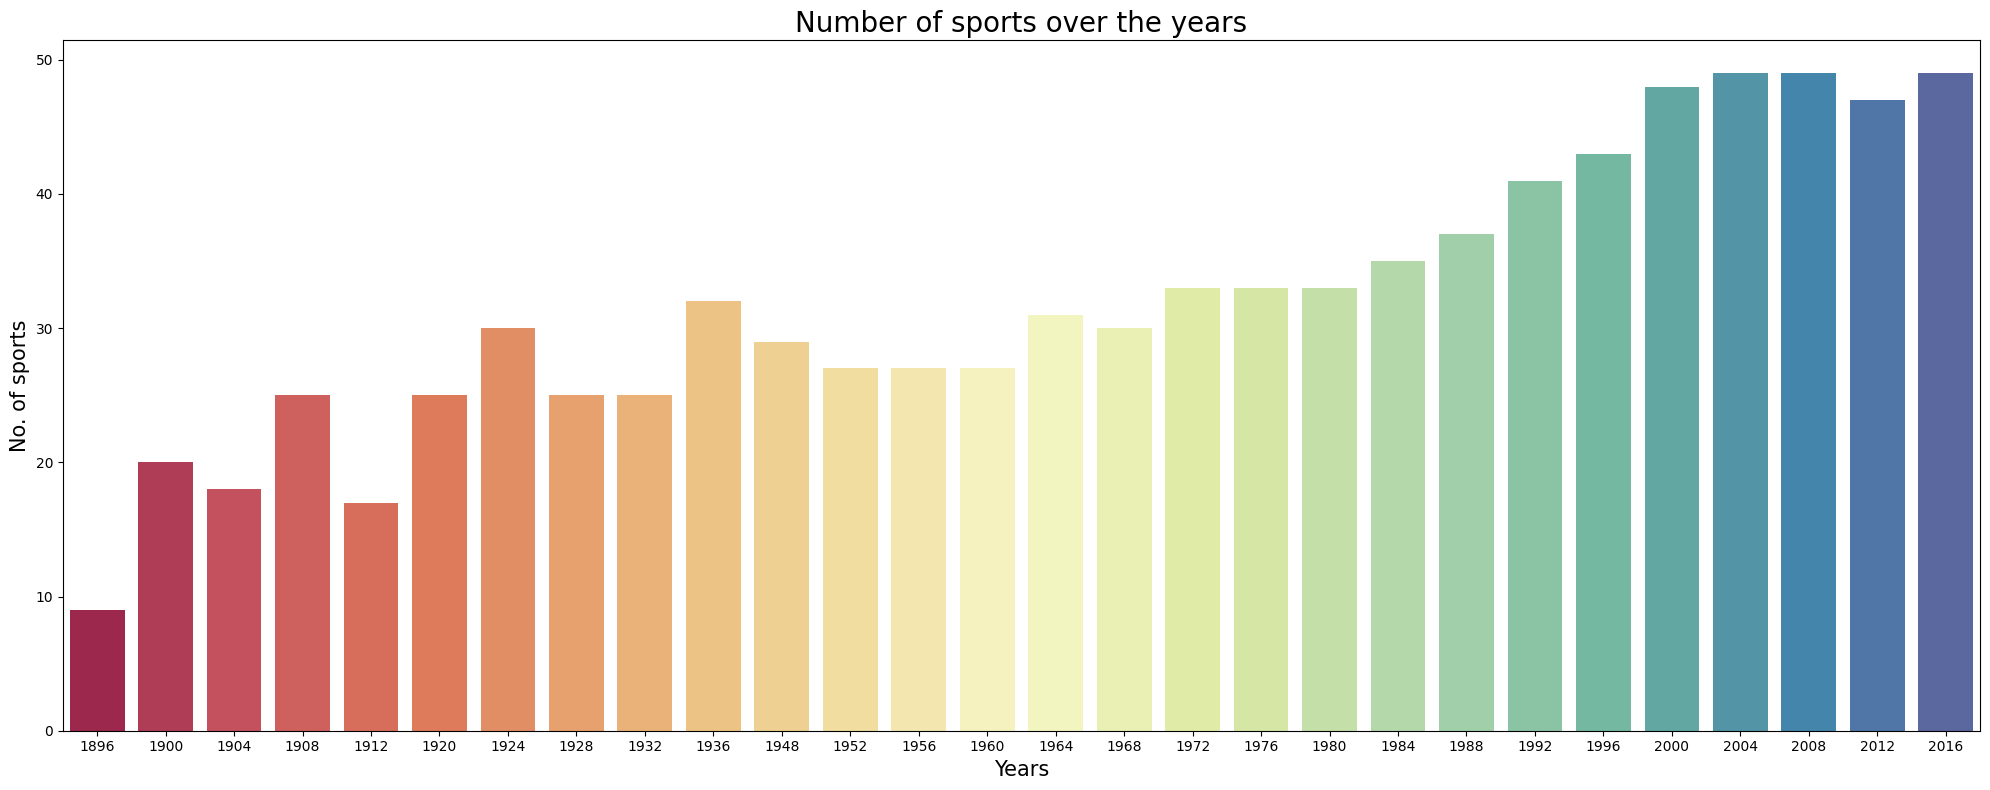

In [101]:
#Crear grafico de barras


sport_per_year_plot = sns.barplot(data=sports_per_year, x=sports_per_year["Year"], y=sports_per_year["Sport"], palette="Spectral")

#Modificar parametros del grafico para hacerlo mas presentable
sport_per_year_plot.figure.set_figwidth(20)
sport_per_year_plot.figure.set_figheight(8)
sport_per_year_plot.set_title("Number of sports over the years", fontsize=20)
sport_per_year_plot.set_xlabel("Years", fontsize=15)
sport_per_year_plot.set_ylabel("No. of sports", fontsize=15)
plt.tight_layout()

#Mostrar grafico
plt.show()


#### - Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo 

In [81]:
#Filtrar el nombre, año y sexo de cada participante. Se eliminan los atletas que participaron en varios eventos el mismo año.
athlete_per_year_and_sex = olympic_history[["Sex","Year","Name"]].drop_duplicates()

display(athlete_per_year_and_sex)

,Sex,Year,Name
0,M,1992,A Dijiang
1,M,2012,A Lamusi
2,M,1920,Gunnar Nielsen Aaby
3,M,1900,Edgar Lindenau Aabye
4,F,1988,Christine Jacoba Aaftink
...,...,...,...
271110,F,2016,Olga Igorevna Zyuzkova
271111,M,1976,Andrzej ya
271112,M,2016,Piotr ya
271114,M,2000,Tomasz Ireneusz ya


In [95]:
#Agrupar por sexo y año. Usando "count()" para obtener el numero de participantes.

athlete_per_year_and_sex_grouped = athlete_per_year_and_sex.groupby(["Sex","Year"], as_index=False).count()
athlete_per_year_and_sex_grouped.rename(columns={"Name":"Athletes"}, inplace=True)

athlete_per_year_and_sex_grouped.sample(5)

,Sex,Year,Athletes
41,M,1964,5346
49,M,1996,8027
30,M,1908,2651
11,F,1956,516
16,F,1976,1490


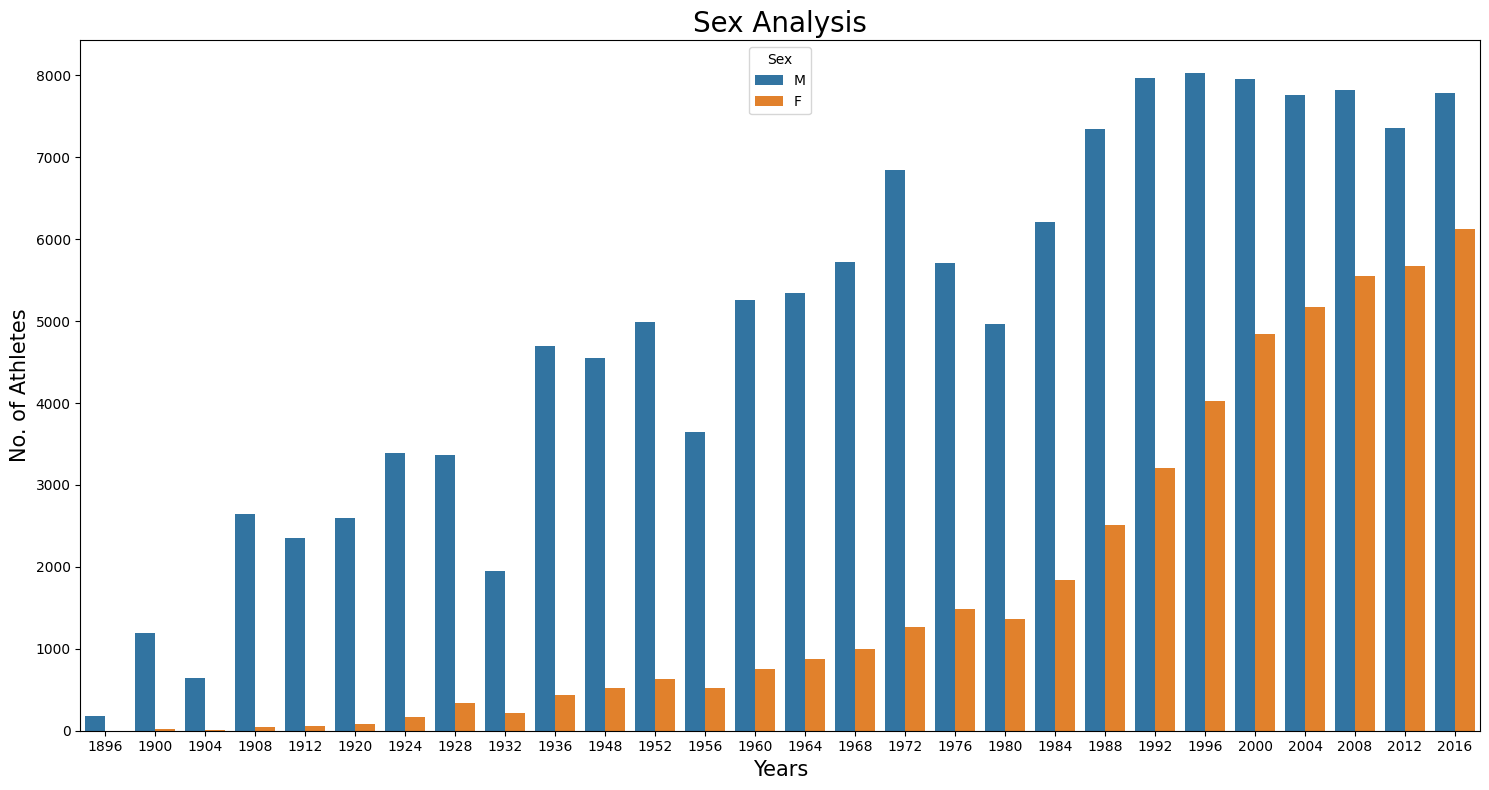

In [102]:
#Crear grafico de barras

athlete_per_year_and_sex_plot = sns.barplot(data=athlete_per_year_and_sex_grouped, 
                                            x="Year", 
                                            y="Athletes",
                                            hue="Sex", 
                                            hue_order = ['M', 'F']
                                           )

#Modificar parametros del grafico para hacerlo mas presentable
athlete_per_year_and_sex_plot.figure.set_figwidth(15)
athlete_per_year_and_sex_plot.figure.set_figheight(8)
athlete_per_year_and_sex_plot.set_title("Sex Analysis", fontsize=20)
athlete_per_year_and_sex_plot.set_xlabel("Years", fontsize=15)
athlete_per_year_and_sex_plot.set_ylabel("No. of Athletes", fontsize=15)
plt.tight_layout()

#Mostrar grafico
plt.show()

#### - Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo 

### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)